In [5]:
class DirGraph:
  """
  class of directed graphs
  """
  
  class Vertex:
    """
    vertices for graphs
    """
    
    def __init__(self,name):
      self._name = name
      self._in = set()
      self._out = set()
      
    @property
    def incoming(self):
      return self._in
    
    @property
    def outgoing(self):
      return self._out
      
    @property
    def name(self):
      return self._name
    
    def isAlone(self):
      return self.incoming == set() and self.outgoing == set()
    
    def __repr__(self):
      return '('+str(self.name)+')'
    
    def __eq__(self,other):
      return self.name == other.name
    
  class Arc:
    """
    arcs for directed graphs
    """
    
    def __init__(self,tail,head,value = None,real=True):
      """
      requires: tail, head are Vertex
      returns arc that goes from vertex tail to vertex head
      real is used for "imaginary tasks" in optimization problems
      """
      self._tail = DirGraph.Vertex(tail)
      self._head = DirGraph.Vertex(head)
      self._value = value
      self._real = real
      
    @property
    def tail(self):
      return self._tail
    
    @property
    def head(self):
      return self._head
    
    @property
    def value(self):
      return self._value
    
    @property
    def real(self):
      return self._real
    
    def __repr__(self):
      return f'{self.tail}-{"--"+str(self.value)+"--" if self.value is not None else ""}>{self.head}'
    
    def __eq__(self,other):
      return self.tail == other.tail and self.head == other.head and self.value == other.value and self.real == other.real
  
  
  def __init__(self,showVertices = True):
    self._vertices = {}
    self._arcs = {}
    self._showV = showVertices
    
  @property
  def vertices(self):
    return self._vertices
  
  @property
  def arcs(self):
    return self._arcs
  
  @property
  def showVertices(self):
    return self._showV
  
  def addVertex(self,vertex):
    """
    requires: vertex is the name/id/value of a vertex
    """
    if vertex in self.vertices.keys():
      print('That vertex already exists in this graph')
    else:
      self.vertices[vertex] = DirGraph.Vertex(vertex)
    
  def addArc(self,tail,head,value = None,real = True):
    """
    requires: tail, head are name/id/value for vertex
    if tail or head aren't already vertices in this graph, they will be created
    """
    if tail not in self.vertices.keys():
      self.addVertex(tail)
    if head not in self.vertices.keys():
      self.addVertex(head)
    self.arcs[(tail,head)]=DirGraph.Arc(tail,head,value,real)
    self.vertices[tail].outgoing.add(head)
    self.vertices[head].incoming.add(tail)
    
  def removeVertex(self,vertex):
    """
    requires: vertex is name/id/value of vertex, not the vertex itself
    removes the named vertex if it is in the graph, otherwise does nothing
    also removes all arcs that have the vertex as their tail or head
    """
    self.vertices.pop(vertex,None)
    arcsToRemove = set()
    for arc in self.arcs:
      if vertex in arc:
        arcsToRemove.add(arc)
    for arc in arcsToRemove:
      self.removeArc(*arc)
    
    
  def removeArc(self,tail,head,removeLoneVertices = True):
    """by default, if after removing the arc there is a vertex that has no arcs incoming or outgoing, will remove the vertex
    set removeLoneVertices to False to avoid that"""
    self.arcs.pop((tail,head),None)
    self.vertices[tail].outgoing.remove(head)
    self.vertices[head].incoming.remove(tail)
    if removeLoneVertices:
      for v in [tail,head]:
        if self.vertices[v].isAlone():
          self.removeVertex(v)
    
  def __repr__(self):
    vert = {value for value in self.vertices.keys()}
    arcs = {value for value in self.arcs.keys()}
    return f'vertices: {vert}\narcs: {arcs}'
  
  from graphviz import Digraph as D
  
  def show(self,horizontal = True): # adapted from prof. João Neto's function showTree
    if horizontal:
      styleGraph = {'nodesep':'.25', 'ranksep':'.5','rankdir':'LR'}
    else:
      styleGraph = {'nodesep':'.25', 'ranksep':'.5'}
    if self.showVertices:
      styleNode  = {'shape':'circle', 'width':'.3', 'fontsize':'12', 'fixedsize':'True'}
    else:
      styleNode = {'shape' : 'circle', 'width' : '.01','fontcolor':'white','fontsize':'1'}
    styleEdge  = {'arrowsize':'0.6','fontsize':'10','decorate':'False'} 
    dot = self.D(graph_attr=styleGraph, node_attr=styleNode, edge_attr=styleEdge)
    for v in self.vertices.keys():
      dot.node(str(v))
    for (a,b),v in self.arcs.items():
      if not v.real:
        dot.edge(str(a),str(b),label = str(v.value) if v.value is not None else '',style='dotted')
      else:
        dot.edge(str(a),str(b),label = str(v.value) if v.value is not None else '')
    # display(dot)
    return dot
  
#   def paths(self,begin,end):
#     if (begin not in g.vertices) or (end not in g.vertices):
#       return False
    
#     for b,e in self.arcs:
      

In [6]:
g = DirGraph(False)

g.addArc(1,2,'A')
g.addArc(1,3,'B')
g.addArc(1,9,'C')
g.addArc(2,4,'D')
g.addArc(2,5,'E')
g.addArc(2,6,'F')
g.addArc(3,7,None,False)
g.addArc(4,7,None,False)
g.addArc(5,14,None,False)
g.addArc(5,13,None,False)
g.addArc(6,13,None,False)
g.addArc(7,8,'I')
g.addArc(7,9,'G')
g.addArc(8,19,'K')
g.addArc(8,11,'L')
g.addArc(11,18,None,False)
g.addArc(8,17,None,False)
g.addArc(17,18,'O')
g.addArc(9,12,'H')
g.addArc(12,13,None,False)
g.addArc(14,16,'J')
g.addArc(12,14,None,False)
g.addArc(16,18,None,False)
g.addArc(13,15,'M')
g.addArc(13,19,'N')
g.addArc(17,18,'O')
g.addArc(18,19,'P')
g.addArc(20,21,'Q')
g.addArc(1,20,'R')
g.removeArc(20,21)

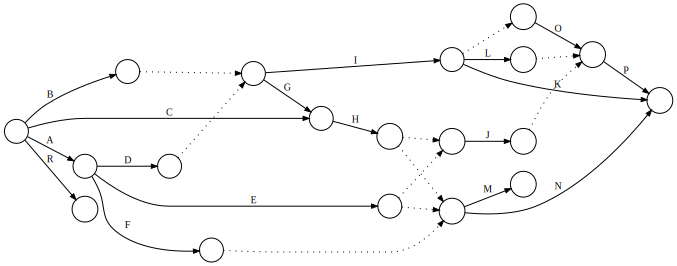

In [7]:
g.show()

In [8]:
matDisc93 = DirGraph(True)

In [9]:
for i,j in [(4,1),(1,2),(2,3),(4,3),(3,1),(3,6),(6,5),(5,3)]:
  matDisc93.addArc(i,j)

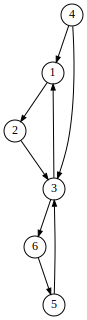

In [10]:
matDisc93.show(False)

In [12]:
DirGraph.Vertex._pool

{1: (1),
 2: (2),
 3: (3),
 9: (9),
 4: (4),
 5: (5),
 6: (6),
 7: (7),
 14: (14),
 13: (13),
 8: (8),
 19: (19),
 11: (11),
 18: (18),
 17: (17),
 12: (12),
 16: (16),
 15: (15),
 20: (20),
 21: (21)}